# **Processamento de Linguagem Natural**

## Trabalho feito para a matéria de Processamento de Linguagem Natural da Pós-Graduação em Ciência de Dados ofertado pela PUCPR - Curitiba.
## Ministrado pelo professor Emerson Cabrera Paraiso.
## Elaborado por Renato Suguiy

In [1]:
import tensorflow as tf

In [1]:
#importando biblioteca de stopwords 
import nltk
nltk.download('stopwords')

ModuleNotFoundError: No module named 'nltk'

In [3]:
import csv
import io
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import train_test_split
#STOPWORDS = set(stopwords.words('portuguese'))

STOPWORDS = set(stopwords.words('portuguese') + list(punctuation))


In [4]:
# Parâmetros Principais

# Tamanho do vocabulário a ser criado com o tokenizer. Este considera as N palavras mais comuns (ou frequentes nos textos)
vocab_size = 50000

# Tamanho do vetor de características que representa cada palavra. Cada palavra é transformada para um vetor com 64 entradas.
embedding_dim = 64

# Tamanho máximo da sequência de códigos que representa um texto (tamanho do feature vector)
max_length = 35

# Tipo de truncagem a ser utilizado, 'post' significa remover valores do final da sequência.
trunc_type = 'post'

# Tipo de padding a ser utilizado, 'post' significa completar no final da sequência.
padding_type = 'post'

# Token a ser utilizado quando uma palavra não presente no vocabulário é encontrada no texto
Not_known = '<NKN>'

# Porcentagem de instâncias a ser utilizada no treinamento
training_portion = .7

In [5]:
# Carrega os textos. Em X o texto de entrada e em y os rótulos.
# Cada linha do texto carrega é filtrada para retirada de stopwords.

def ler(file):
    with open(file, 'rt', encoding='utf8') as txtfile:
        classe = ''
        positivo, negativo, neutro, surpresa = 0,0,0,0
        texto = csv.reader(txtfile, delimiter=';')      # lê um texto do arquivo
        print(texto)
        next(texto)
        for linha in texto:       # processa cada linha do texto
            #texto = linha.split(';')
            
            if linha[0] == 'surpresa':
                surpresa = surpresa + 1
                continue
            elif linha[0] == 'neutro':
                classe = 'neutro'
                neutro = neutro + 1
            elif linha[0] == 'alegria':
                positivo = positivo + 1
                classe = 'positivo'
            elif linha[0] == 'raiva' or 'medo' or 'desgosto' or 'tristeza':
                negativo = negativo + 1
                classe = 'negativo'
           
            y.append(classe)    # rotulo da linha
            aux = linha[2]
            for word in STOPWORDS:        # retirada de stopwords
                token = ' ' + word + ' '
                aux = aux.replace(token, ' ')
                aux = aux.replace(' ', ' ')
            X.append(aux)
            
        print(surpresa,positivo, negativo, neutro)
X = []
y = []
ler('2000_textos.txt')

print(len(y))       # quantidade de rótulos
print(len(X))       # quantidade de textos

train_X, validation_X, train_y, validation_y = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)


252 183 1022 542
1747
1747


In [6]:
# Cria o vocabulário a partir da base de treinamento considerando o tamanho definido em vocab_size.
# Utiliza como coringa o símbolo Not_known
tokenizer = Tokenizer(num_words = vocab_size, oov_token=Not_known)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index

In [7]:
# Lista os N primeiros vocábulos do dicionários (os N mais frequentes)
N=10
dict(list(word_index.items())[0:N])


{'<NKN>': 1,
 'diz': 2,
 'anos': 3,
 'feira': 4,
 'segundo': 5,
 'polícia': 6,
 'após': 7,
 'pessoas': 8,
 'contra': 9,
 'país': 10}

In [8]:
# Converte uma linha de texto em uma sequência de valores
train_sequences = tokenizer.texts_to_sequences(train_X)

In [9]:
# Mostra uma linha de texto convertida para sequência de valores
# Cada valor representa uma palavra do vocabulário
print(train_sequences[5])

[3428, 2118, 3429, 1148, 126, 759, 1518, 3430, 3431, 2119, 12, 22, 4, 3432, 3433, 2118, 146, 2120, 1148, 923, 760, 2121, 2122, 3434, 126, 759, 2123, 3435, 274, 761, 3436]


In [10]:
# Transforma todas as sequências para um tamanho fixo. Sequências pequenas são completadas e sequências maiores que o limite são truncadas
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

21
35
19
35
25
35


In [12]:
# Imprime uma sequência
print(train_padded[6])

[  90 3437 2124 1149 3438    7  472 1519 3439 2125 3440 3441 1150 2126
   73 1151 3442    5    6   81    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [13]:
# Tokeniza a base de validação.

validation_sequences = tokenizer.texts_to_sequences(validation_X)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

525
(525, 35)


In [14]:
# Mostra o conjunto de rótulos
print(set(y))

{'positivo', 'neutro', 'negativo'}


In [15]:
# Tokeniza os rótulos
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

# Observe que subtraímos 1 dos códigos para estes comecem em 0
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_y))-1
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_y))-1

In [16]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[400])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[50])
print(validation_label_seq.shape)

[1]
[2]
[0]
(1222, 1)
[0]
[2]
[0]
(525, 1)


In [17]:
# Confere como ficaram as nossas frases depois de transformdas
# Apenas para conferência.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_X[10])

coreia sul eua elevam alerta militar conta coreia norte nível alerta subiu 1 2 maior desde outubro 2006 vigilância sobre regime pyongyang reforçada aviões pessoal ? ? ? ? ? ? ? ? ? ?
---
coreia sul eua elevam alerta militar conta coreia norte: nível alerta subiu 1 2, maior desde outubro 2006. vigilância sobre regime pyongyang reforçada aviões pessoal.


In [18]:
# Criando a rede LSTM (Long Short Term Memory)

hidden_size=64
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
#model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25 , recurrent_dropout=0.25))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# Compilando a LSTM
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da LSTM
num_epochs = 100
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          3200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 3,274,499
Trainable params: 3,274,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
39/39 - 2s - loss: 0.9626 - accuracy: 0.5663 - val_loss: 0.8842 - val_accuracy: 0.5848
Epoch 2/100
39/39 - 1s - loss: 0.6355 - accuracy: 0.7242 - val_loss: 0.6737 - val_accuracy: 0.7181
Epoch 3/100
39/39 - 1s - loss: 0.3150 - accura

Epoch 72/100
39/39 - 1s - loss: 1.0291e-06 - accuracy: 1.0000 - val_loss: 2.2274 - val_accuracy: 0.7410
Epoch 73/100
39/39 - 1s - loss: 9.9746e-07 - accuracy: 1.0000 - val_loss: 2.2347 - val_accuracy: 0.7410
Epoch 74/100
39/39 - 1s - loss: 9.6332e-07 - accuracy: 1.0000 - val_loss: 2.2419 - val_accuracy: 0.7410
Epoch 75/100
39/39 - 1s - loss: 9.3181e-07 - accuracy: 1.0000 - val_loss: 2.2488 - val_accuracy: 0.7410
Epoch 76/100
39/39 - 1s - loss: 9.0245e-07 - accuracy: 1.0000 - val_loss: 2.2560 - val_accuracy: 0.7410
Epoch 77/100
39/39 - 1s - loss: 8.7572e-07 - accuracy: 1.0000 - val_loss: 2.2630 - val_accuracy: 0.7410
Epoch 78/100
39/39 - 1s - loss: 8.4538e-07 - accuracy: 1.0000 - val_loss: 2.2702 - val_accuracy: 0.7410
Epoch 79/100
39/39 - 1s - loss: 8.1738e-07 - accuracy: 1.0000 - val_loss: 2.2778 - val_accuracy: 0.7410
Epoch 80/100
39/39 - 1s - loss: 7.8851e-07 - accuracy: 1.0000 - val_loss: 2.2843 - val_accuracy: 0.7410
Epoch 81/100
39/39 - 1s - loss: 7.6519e-07 - accuracy: 1.0000 - 

In [19]:
# Criando uma RNN (Recurrent Neural Network)

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model2.add(tf.keras.layers.SimpleRNN(units=64))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
model2.summary() 

# Compilando a RNN
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da RNN
history2 = model2.fit(train_padded, training_label_seq, batch_size=32, epochs=100, validation_data=(validation_padded, validation_label_seq), verbose=2)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 35, 64)            3200000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 3,212,611
Trainable params: 3,212,611
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
39/39 - 1s - loss: 0.9241 - accuracy: 0.5745 - val_loss: 0.9190 - val_accuracy: 0.5848
Epoch 2/100
39/39 - 1s - loss: 0.5206 - accuracy: 0.8142 - val_loss: 1.0912 - val_accuracy: 0.5619
Epoch 3/100
39/39 - 1s - loss: 0.0899 - accu

Epoch 72/100
39/39 - 1s - loss: 9.0894e-06 - accuracy: 1.0000 - val_loss: 3.2383 - val_accuracy: 0.4990
Epoch 73/100
39/39 - 1s - loss: 8.7888e-06 - accuracy: 1.0000 - val_loss: 3.2473 - val_accuracy: 0.4990
Epoch 74/100
39/39 - 1s - loss: 8.5035e-06 - accuracy: 1.0000 - val_loss: 3.2575 - val_accuracy: 0.4990
Epoch 75/100
39/39 - 1s - loss: 8.2312e-06 - accuracy: 1.0000 - val_loss: 3.2662 - val_accuracy: 0.4990
Epoch 76/100
39/39 - 1s - loss: 7.9678e-06 - accuracy: 1.0000 - val_loss: 3.2752 - val_accuracy: 0.4990
Epoch 77/100
39/39 - 1s - loss: 7.7083e-06 - accuracy: 1.0000 - val_loss: 3.2839 - val_accuracy: 0.4990
Epoch 78/100
39/39 - 1s - loss: 7.4649e-06 - accuracy: 1.0000 - val_loss: 3.2928 - val_accuracy: 0.4990
Epoch 79/100
39/39 - 1s - loss: 7.2314e-06 - accuracy: 1.0000 - val_loss: 3.3015 - val_accuracy: 0.5010
Epoch 80/100
39/39 - 1s - loss: 7.0072e-06 - accuracy: 1.0000 - val_loss: 3.3105 - val_accuracy: 0.5010
Epoch 81/100
39/39 - 1s - loss: 6.7935e-06 - accuracy: 1.0000 - 

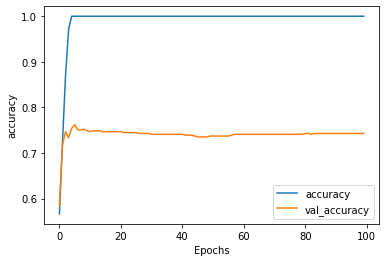

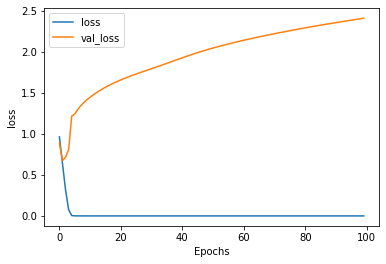

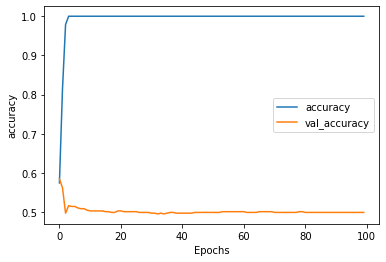

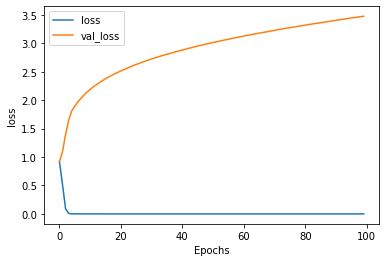

In [25]:
# Imprime gráfico histórico do treinamento
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")  

In [21]:
# Testando uma frase

txt = ['correção: cremer pode deixar o novo mercado. na nota enviada anteriormente, em vez do título controladores da cremer devem deixar o novo mercado, o correto é cremer deve deixar o novo mercado.']
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['positivo', 'negativo', 'neutro']
print(pred, labels[np.argmax(pred)])

print("Resultado na validacao:")
score=model.evaluate(validation_padded, validation_label_seq, verbose=0)
score2=model2.evaluate(validation_padded, validation_label_seq, verbose=0)

print('LSTM')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('RNN')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


[[3.7199735e-12 1.0000000e+00 6.4117640e-09]] negativo
Resultado na validacao:
LSTM
Test loss: 2.407686471939087
Test accuracy: 0.7428571581840515
RNN
Test loss: 3.4754350185394287
Test accuracy: 0.4990476071834564


In [22]:
# Plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  thresh = cm.max()*5
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
	  Negativo  Neutro     positivo 
F-Score	 [0.83774834 0.68221574 0.38834951]
Precisão [0.85185185 0.65       0.41666667]
Recall	 [0.82410423 0.71779141 0.36363636]


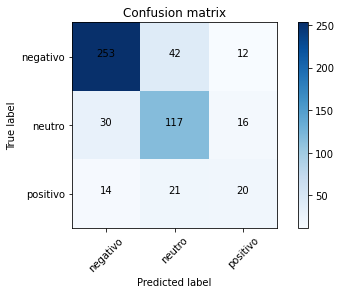

In [23]:
# Preparar Matriz de Confusão LSTM
import itertools
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


y_predict=np.argmax(model.predict(validation_padded), axis=-1)
val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, y_predict)
cm_plot_labels=['negativo','neutro', 'positivo']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')
fScore = f1_score (val, y_predict,average=None)
precision = precision_score(val, y_predict,average=None)
recall = recall_score(val, y_predict,average=None)
print('\t  Negativo', ' Neutro   ', ' positivo ')
print('F-Score\t',fScore)
print('Precisão',precision)
print('Recall\t',recall)


Confusion matrix, without normalization
	  Negativo  Neutro     positivo 
F-Score	 [0.64102564 0.33220339 0.19847328]
Precisão [0.63091483 0.37121212 0.17105263]
Recall	 [0.6514658  0.3006135  0.23636364]


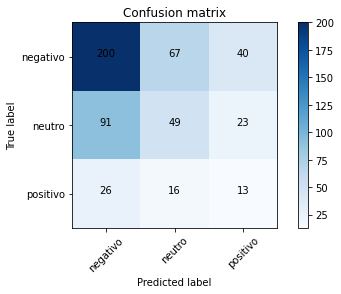

In [24]:
# Preparar Matriz de Confusão RNN
import itertools
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


y_predict=np.argmax(model2.predict(validation_padded), axis=-1)
val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, y_predict)
cm_plot_labels=['negativo','neutro', 'positivo']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')
fScore = f1_score (val, y_predict,average=None)
precision = precision_score(val, y_predict,average=None)
recall = recall_score(val, y_predict,average=None)
print('\t  Negativo', ' Neutro   ', ' positivo ')
print('F-Score\t',fScore)
print('Precisão',precision)
print('Recall\t',recall)
